**K-Means Clustering**

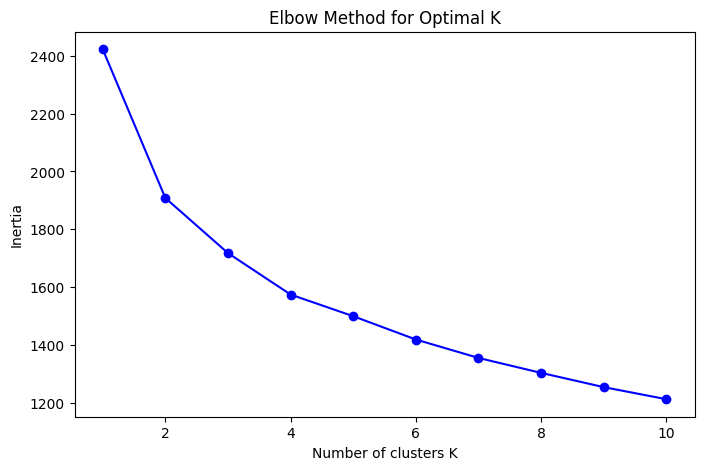

Silhouette Score for K-Means (K=2): 0.2150


In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use only features (X_reduced) for clustering
X_cluster = X_reduced.copy()

# Determine optimal K using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# From the plot, choose K (e.g., K=2 for binary disease)
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Optional: Silhouette score
sil_score = silhouette_score(X_cluster, cluster_labels)
print(f"Silhouette Score for K-Means (K=2): {sil_score:.4f}")


**Hierarchical Clustering**

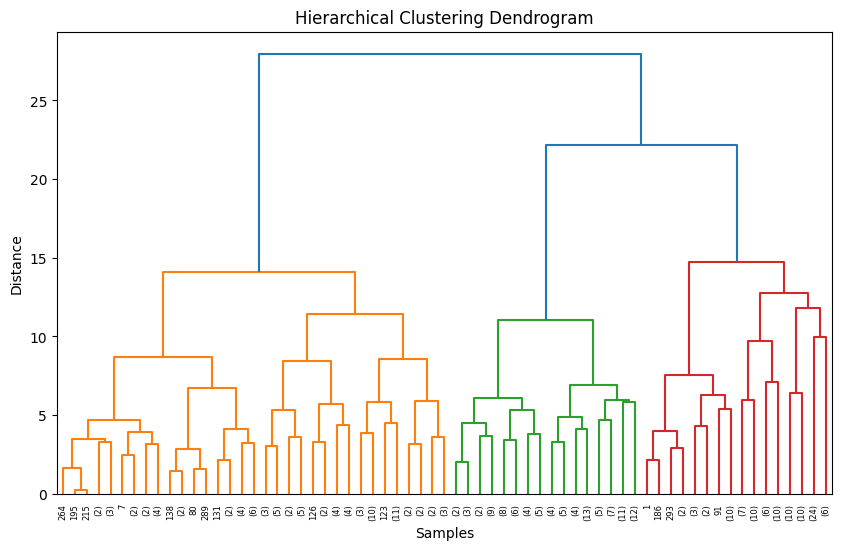

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate linkage matrix
Z = linkage(X_cluster, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cut dendrogram to get 2 clusters
hier_labels = fcluster(Z, t=2, criterion='maxclust')


**Compare Clusters with Actual Labels**

In [112]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# K-Means
print("=== K-Means Clustering vs Actual Labels ===")
print(confusion_matrix(y, cluster_labels))

# Hierarchical
print("\n=== Hierarchical Clustering vs Actual Labels ===")
print(confusion_matrix(y, hier_labels))


=== K-Means Clustering vs Actual Labels ===
[[140  21]
 [ 40  98]]

=== Hierarchical Clustering vs Actual Labels ===
[[  0  23 138]
 [  0  72  66]
 [  0   0   0]]
